**心得:我覺得本次作業能嘗試不同的混色方法很有趣，原來要處理影像，背後要用到如此多的數學和理論。同時這次作業也讓我學到更多函數的用法，像是我要把處理過的矩陣顯示成圖像要用Image.fromarray，初始化2維矩陣用np.zeros(row,column)的方法易讀又方便，我原本是用for去初始化，但是比較麻煩，plt的imshow如果不加參數會使用預設的調色盤，導致灰階圖出現不是我們要的樣子，這次的作業讓我提升了影像處理和python的功力。**

***區塊取代法***



step1:定義影像矩陣OriginalImage、HalfToneImage將欲處理影像讀入OriginalImage二維矩陣

In [25]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img=Image.open('test.png')
img=img.resize((512,512))#resize image's size
img = img.convert('L')#轉成灰階圖片
OriginalImage=np.asarray(img)#use numpy to read image to 2 dimension matrix
HalfToneImage =np.zeros((512,512))#512*512
print(OriginalImage.shape)#shape=512row*512col
print(type(HalfToneImage))


(512, 512)
<class 'numpy.ndarray'>


step2:定義模板

In [21]:
define_block = [
    [[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]],
    [[1, 1, 1, 1], [1, 1, 0, 1], [1, 1, 1, 1], [1, 1, 1, 1]],
    [[1, 1, 1, 1], [1, 1, 0, 1], [1, 1, 0, 1], [1, 1, 1, 1]],
    [[1, 1, 1, 1], [1, 0, 0, 1], [1, 1, 0, 1], [1, 1, 1, 1]],
    [[1, 1, 1, 1], [1, 0, 0, 1], [1, 0, 0, 1], [1, 1, 1, 1]],
    [[1, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [1, 1, 1, 1]],
    [[1, 1, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1], [1, 1, 1, 1]],
    [[1, 1, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1], [1, 1, 0, 1]],
    [[1, 0, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1], [1, 1, 0, 1]],
    [[0, 0, 0, 0], [0, 1, 1, 1], [1, 1, 1, 0], [0, 0, 1, 0]],
    [[0, 0, 0, 0], [0, 1, 1, 1], [1, 1, 1, 0], [0, 0, 0, 0]],
    [[0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 0], [0, 0, 0, 0]],
    [[0, 0, 0, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 0, 0, 0]],
    [[0, 0, 0, 0], [0, 1, 1, 0], [0, 0, 1, 0], [0, 0, 0, 0]],
    [[0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 0]],
    [[0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0]],
    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]],
]

step3:為了方便計算，我們先將各區塊模板的平均灰階值做計算並儲存在一個陣列中

In [22]:
block_gray=[]
sum=0
for i in range(17):#0-16
  sum=0
  for j in range(4):
    for k in range(4):
      if(define_block[i][j][k]==1):
        sum+=255
  block_gray.append(sum/16)
print(f"{block_gray}")

[255.0, 239.0625, 223.125, 207.1875, 191.25, 175.3125, 159.375, 143.4375, 127.5, 111.5625, 95.625, 79.6875, 63.75, 47.8125, 31.875, 15.9375, 0.0]


step4:尋找最近之區塊並取代之

(-0.5, 511.5, 511.5, -0.5)

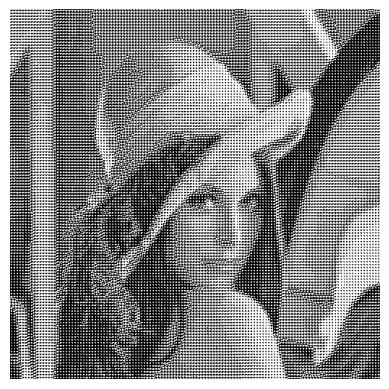

In [23]:
minvalue=0.0
minindex=0
for i in range(0,512,4):
  for j in range(0,512,4):
    sum = 0
    minvalue = 0.0
    minindex = 0
    for x in range(4):
      for y in range(4):
        sum += OriginalImage[i+x][j+y]
    sum=sum/16
    for x in range(17):
      if (x==0):
        minvalue = (int)(abs(sum-block_gray[0]))
        minindex = 0;
      else:
        if (minvalue > (int)(abs(sum-block_gray[x]))):
          minvalue = (int)(abs(sum-block_gray[x]))
          minindex = x
    for x in range(4):
      for y in range(4):
        if(define_block[minindex][x][y]==1):
          HalfToneImage[i+x][j+y]=255
        else:
          HalfToneImage[i+x][j+y]=0
#print(HalfToneImage)
data = Image.fromarray(np.uint8(HalfToneImage))
plt.imshow(data,cmap='gray')
plt.axis('off')

***有序抖動法***

step1.定義影像矩陣OriginalImage、HalfToneImage將欲處理影像讀入OriginalImage二維矩陣

In [35]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img=Image.open('test.png')
img=img.resize((512,512))#resize image's size
img = img.convert('L')#轉成灰階圖片
OriginalImage=np.asarray(img)#use numpy to read image to 2 dimension matrix
HalfToneImage =np.zeros((512,512))#512*512
print(OriginalImage.shape)#shape=512row*512col
print(type(HalfToneImage))

(512, 512)
<class 'numpy.ndarray'>


step2.定義有序抖動矩陣

In [36]:
DitherArray =[
 [0.513,0.272,0.724,0.483,0.543,0.302,0.694,0.453],
 [0.151,0.755,0.091,0.966,0.181,0.758,0.121,0.936],
 [0.634,0.392,0.574,0.332,0.664,0.423,0.604,0.362],
 [0.060,0.875,0.211,0.815,0.030,0.906,0.241,0.845],
 [0.543,0.302,0.694,0.453,0.513,0.272,0.724,0.483],
 [0.181,0.758,0.121,0.936,0.151,0.755,0.091,0.936],
 [0.664,0.423,0.604,0.362,0.634,0.392,0.574,0.332],
 [0.030,0.906,0.241,0.845,0.060,0.875,0.211,0.815]]



step3.將每一個區塊內的像素點與相對於有序抖動矩陣位值之閾值進行比較

(-0.5, 511.5, 511.5, -0.5)

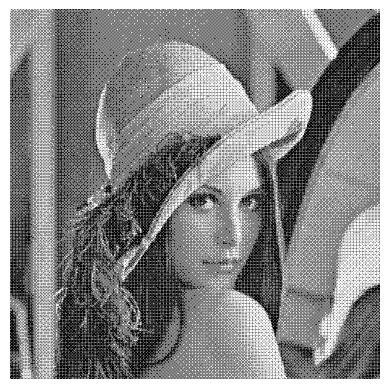

In [37]:
tempnumber=0.0
for i in range(0,512,8):
  for j in range(0,512,8):
    for x in range(8):
      for y in range(8):
        tempnumber = OriginalImage[i+x][j+y]/255.0;
        if (tempnumber<DitherArray[x][y]):
          HalfToneImage [i+x][j+y]=0;
        else:
          HalfToneImage [i+x][j+y]=255;
#print(HalfToneImage)
data = Image.fromarray(np.uint8(HalfToneImage))
plt.imshow(data,cmap='gray')
plt.axis('off')

***錯誤擴散法***

step1.定義影像矩陣OriginalImage、HalfToneImage將欲處理影像讀入OriginalImage二維矩陣

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img=Image.open('test.png')
img=img.resize((512,512))#resize image's size
img = img.convert('L')#轉成灰階圖片
OriginalImage=np.asarray(img)#use numpy to read image to 2 dimension matrix
HalftoneImage =np.zeros((512,512))#512*512
print(OriginalImage.shape)#shape=512row*512col
print(type(HalftoneImage))

(512, 512)
<class 'numpy.ndarray'>


step2.定義權重擴散矩陣

In [32]:
errorarry=[[0.0,0.0,0.0,0.19040,0.095230],
		  [0.04762,0.095230,0.19040, 0.095230,0.04762],
		  [0.02381,0.047620,0.095230,0.047620,0.02381]]


step3.依序從影像左上角至右下角處理每一像素，目前像素大於等於128，則該點為白(255)，反之則為黑(0)。並且將誤差依相對應位置和權重擴散出去

(-0.5, 511.5, 511.5, -0.5)

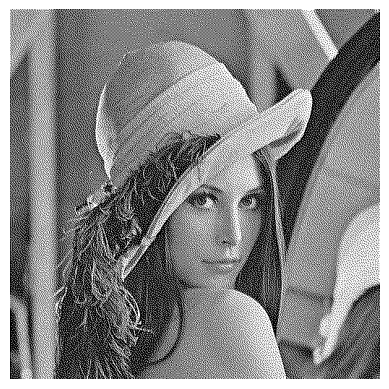

In [33]:
for i in range(512):
  for j in range(512):
    HalftoneImage[i][j] = OriginalImage[i][j]

for i in range(512):
  for j in range(512):
    if (HalftoneImage[i][j] < 128):
      errorvalue = (HalftoneImage[i][j]-0)
      HalftoneImage[i][j]=0
    else:
      errorvalue = (HalftoneImage[i][j]-255);
      HalftoneImage[i][j]=255;

    for x in range(3):
      if ((i+x)<0 or (i+x)>=512):
        continue
      for y in range(-2,3):
        if ((j+y)<0 or (j+y)>=512):
          continue
        if (errorarry[x][y+2]==0):
          continue
        Weightvalue = (errorarry[x][y+ 2]*errorvalue)
        HalftoneImage[i+x][j+y]=HalftoneImage[i+x][j+y]+Weightvalue
data = Image.fromarray(np.uint8(HalftoneImage))
plt.imshow(data,cmap='gray')
plt.axis('off')


***點擴散法***

step1.定義影像矩陣OriginalImage、HalfToneImage將欲處理影像讀入OriginalImage二維矩陣

In [28]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img=Image.open('test.png')
img=img.resize((512,512))#resize image's size
img = img.convert('L')#轉成灰階圖片
OriginalImage=np.asarray(img)#use numpy to read image to 2 dimension matrix
HalftoneImage =np.zeros((512,512))#512*512
print(OriginalImage.shape)#shape=512row*512col
print(type(HalftoneImage))

(512, 512)
<class 'numpy.ndarray'>


step2.定義擴散順序矩陣與擴散權重矩陣

In [29]:
ClassMatrix = [
    [204, 0, 5, 33, 51, 59, 23, 118, 54, 69, 40, 160, 169, 110, 168, 188],
    [3, 6, 22, 36, 60, 50, 74, 115, 140, 82, 147, 164, 171, 142, 220, 214],
    [14, 7, 42, 16, 63, 52, 94, 56, 133, 152, 158, 177, 179, 208, 222, 1],
    [15, 26, 43, 75, 79, 84, 148, 81, 139, 136, 166, 102, 217, 219, 226, 4],
    [17, 39, 72, 92, 103, 108, 150, 135, 157, 193, 190, 100, 223, 225, 227, 13],
    [28, 111, 99, 87, 116, 131, 155, 112, 183, 196, 181, 224, 232, 228, 12, 21],
    [47, 120, 91, 105, 125, 132, 172, 180, 184, 205, 175, 233, 245, 8, 20, 41],
    [76, 65, 129, 137, 165, 145, 178, 194, 206, 170, 229, 244, 246, 19, 24, 49],
    [80, 73, 106, 138, 176, 182, 174, 197, 218, 235, 242, 249, 247, 18, 48, 68],
    [101, 107, 134, 153, 185, 163, 202, 173, 231, 241, 248, 253, 44, 88, 70, 45],
    [123, 141, 149, 61, 195, 200, 221, 234, 240, 243, 254, 38, 46, 77, 104, 109],
    [85, 96, 156, 130, 203, 215, 230, 250, 251, 252, 255, 53, 62, 93, 86, 117],
    [151, 167, 189, 207, 201, 216, 236, 239, 25, 31, 34, 113, 83, 95, 124, 114],
    [144, 146, 191, 209, 213, 237, 238, 29, 32, 55, 64, 97, 126, 78, 128, 159],
    [187, 192, 198, 212, 9, 10, 30, 35, 58, 67, 90, 71, 122, 127, 154, 161],
    [199, 210, 211, 2, 11, 27, 37, 57, 66, 89, 98, 121, 119, 143, 162, 186]
]
ErrorArray=[
      [0.38459,1,0.38459],
      [1,0,1],
      [0.38459,1,0.38459]
      ]


step3.將每一個區塊內依照相對應擴散順序矩陣由大到小進行處理，目前像素大於等於128則該點為白(255)，反之則為黑(0)。接著再對該點由灰階數值變為255或0的誤差值，乘上相對擴散誤差權重加到相對應之位置


[[255. 255. 255. ... 255. 255.   0.]
 [255.   0.   0. ... 255.   0.   0.]
 [255.   0. 255. ...   0. 255. 255.]
 ...
 [  0.   0.   0. ...   0. 255.   0.]
 [  0.   0. 255. ...   0.   0. 255.]
 [  0.   0. 255. ... 255.   0. 255.]]
<PIL.Image.Image image mode=L size=512x512 at 0x7BDFDBAC55D0>


(-0.5, 511.5, 511.5, -0.5)

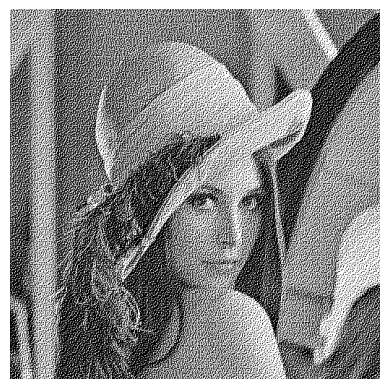

In [30]:
for i in range(512):
  for j in range(512):
    HalftoneImage[i][j] = OriginalImage[i][j]
for k in range(0, 256):
  for i in range(0, 512, 16):
    for j in range(0, 512, 16):
      findvalue=0
      for x in range(0, 16):
        for y in range(0, 16):
          if (k == ClassMatrix[x][y]):
            if (HalftoneImage[i+x][j+y] < 128):
              errorvalue = HalftoneImage[i+x][j+y]-0
              HalftoneImage[i+x][j+y]=0
            else:
              errorvalue = HalftoneImage[i+x][j+y]-255
              HalftoneImage[i+x][j+y]=255
            Weightsum=0
            for p in range(-1, 2):
              if ((x+p)<0 or (i+x+p)>=512):
                continue
              for q in range(-1, 2):
                if ((y+q)<0 or (j+y+q)>=512):
                  continue
                Index_X = (x+p)%16
                Index_Y = (y+q)%16
                if ((x+p)<0):
                  Index_X = 16+Index_X
                if ((y+q)<0):
                  Index_Y = 16+Index_Y
                if (ClassMatrix[Index_X][Index_Y]>k):
                  Weightsum = (Weightsum + ClassMatrix[(p+1)][(q+1)])

            for p in range(-1, 2):
              if ((x+p)<0 or (i+x+p)>=512):
                continue
              for q in range(-1, 2):
                if ((y+q)<0 or (j+y+q)>=512):
                  continue
                Index_X = (x+p)%16
                Index_Y = (y+q)%16
                if ((x+p)<0):
                  Index_X = 16+Index_X
                if ((y+q)<0):
                  Index_Y = 16+Index_Y
                if (ClassMatrix[Index_X][Index_Y]>k and Weightsum!=0):
                  HalftoneImage[i+x+p][j+y+q] = HalftoneImage[i+x+p][j+y+q] + (errorvalue*ClassMatrix[(p+1)][(q+1)]/Weightsum)
print(HalftoneImage)
data = Image.fromarray(np.uint8(HalftoneImage))
print(data)
plt.imshow(data,cmap='gray')
plt.axis('off')